<a href="https://colab.research.google.com/github/SonakshiA/Breast-Cancer-using-KNN/blob/main/KNN_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import numpy as np
import pandas as pd

In [3]:
dataset = 'https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sonakshiarora02
Your Kaggle Key: ··········


100%|██████████| 48.6k/48.6k [00:00<00:00, 25.4MB/s]

In [4]:
data = pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Visualising the Data based on Radius Mean and Texture Mean**

In [14]:
import seaborn as sns

<Axes: xlabel='texture_mean', ylabel='radius_mean'>

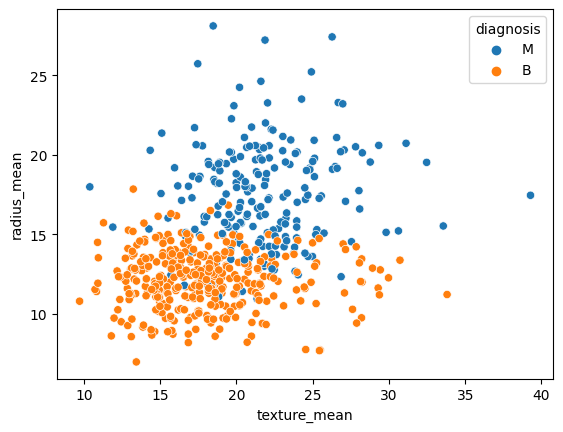

In [15]:
sns.scatterplot(x=data['texture_mean'],y=data['radius_mean'], hue=data['diagnosis'])

In [6]:
Y = data['diagnosis']
X = data.drop(columns = 'diagnosis')

In [17]:
print(X)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.3, random_state =42)


In [9]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
import math

**As a thumb rule, the optimal value of n_neighbors is square root of the number of features used for classification**

In [21]:
classifier = KNeighborsClassifier(n_neighbors=int(math.sqrt(19)))
classifier.fit(X_train_std,Y_train)
Y_pred = classifier.predict(X_test_std)


In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print("Accuracy Score: ",accuracy_score(Y_pred,Y_test))

Accuracy Score:  0.9598997493734336


In [24]:
pred_values = pd.DataFrame({'Actual values':Y_test, 'Predicted values: ':Y_pred})
pred_values.head(n=20)

,Actual values,Predicted values:
204,B,B
70,M,M
131,M,M
431,B,B
540,B,B
567,M,M
369,M,M
29,M,M
81,B,M
477,B,B
